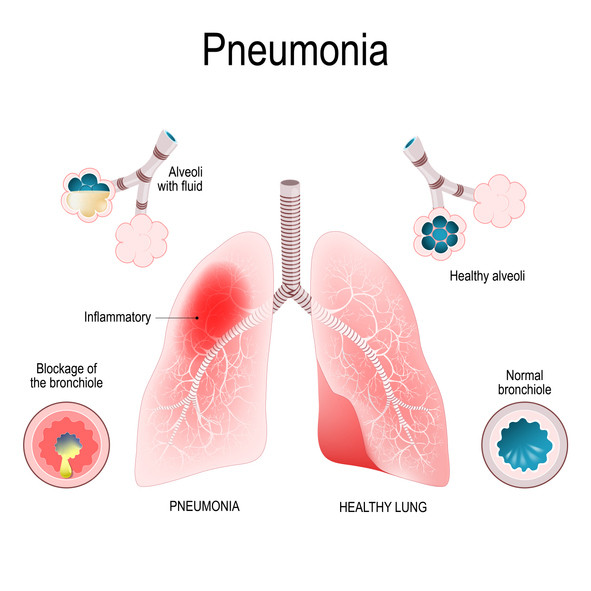

In [4]:
from IPython.display import Image
Image("../input/pneumoniadata/Pneumonia.jpg")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import glob
import seaborn as sns

In [6]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow.keras.applications.resnet import ResNet152
from keras.applications.resnet import preprocess_input
print("Importing libraries completed.")

Importing libraries completed.


In [7]:
path = '../input/chest-xray-pneumonia/chest_xray/'

In [9]:
train_folder=path+"train/"
train_normal_dir=train_folder+"NORMAL/"
train_pneu_dir=train_folder+"PNEUMONIA/"

In [11]:
test_folder=path+"test/"
test_normal_dir=test_folder+"NORMAL/"
test_pneu_dir=test_folder+"PNEUMONIA/"

In [12]:
val_folder=path+"val/"
val_normal_dir=val_folder+"NORMAL/"
val_pneu_dir=val_folder+"PNEUMONIA/"

In [13]:
img_width=196
img_height=196
batch_size=64
epochs=10
print("Variable declaration completed.")

Variable declaration completed.


In [14]:
train_class_names=os.listdir(train_folder)
print("Train class names: %s" % (train_class_names))

test_class_names=os.listdir(test_folder)
print("Test class names: %s" % (test_class_names))

val_class_names=os.listdir(val_folder)
print("Validation class names: %s" % (val_class_names))
print("\nDataset class name listing completed.")

Train class names: ['PNEUMONIA', 'NORMAL']
Test class names: ['PNEUMONIA', 'NORMAL']
Validation class names: ['PNEUMONIA', 'NORMAL']

Dataset class name listing completed.


In [15]:
def Get_Xray_Type(argument):
    switcher = {
        "NORMAL": "Normal",
        "PNEUMONIA": "Pneumonia",
    }
    return switcher.get(argument, "Invalid X-ray")
print("Declaration of functions completed.")

Declaration of functions completed.


In [16]:
train_normal_cases = glob.glob(train_normal_dir + '*jpeg')
train_pneu_cases = glob.glob(train_pneu_dir + '*jpeg')

test_normal_cases = glob.glob(test_normal_dir + '*jpeg')
test_pneu_cases = glob.glob(test_pneu_dir + '*jpeg')

val_normal_cases = glob.glob(val_normal_dir + '*jpeg')
val_pneu_cases = glob.glob(val_pneu_dir + '*jpeg')

train_list = []
test_list = []
val_list = []

for x in train_normal_cases:
    train_list.append([x, "Normal"])
    
for x in train_pneu_cases:
    train_list.append([x, "Pneumonia"])
    
for x in test_normal_cases:
    test_list.append([x, "Normal"])
    
for x in test_pneu_cases:
    test_list.append([x, "Pneumonia"])
    
for x in val_normal_cases:
    val_list.append([x, "Normal"])
    
for x in val_pneu_cases:
    val_list.append([x, "Pneumonia"])
    
train_df = pd.DataFrame(train_list, columns=['image', 'Diagnos'])
print(train_df.shape)
test_df = pd.DataFrame(test_list, columns=['image', 'Diagnos'])
print(test_df.shape)
val_df = pd.DataFrame(val_list, columns=['image', 'Diagnos'])
print(val_df.shape)

(5216, 2)
(624, 2)
(16, 2)


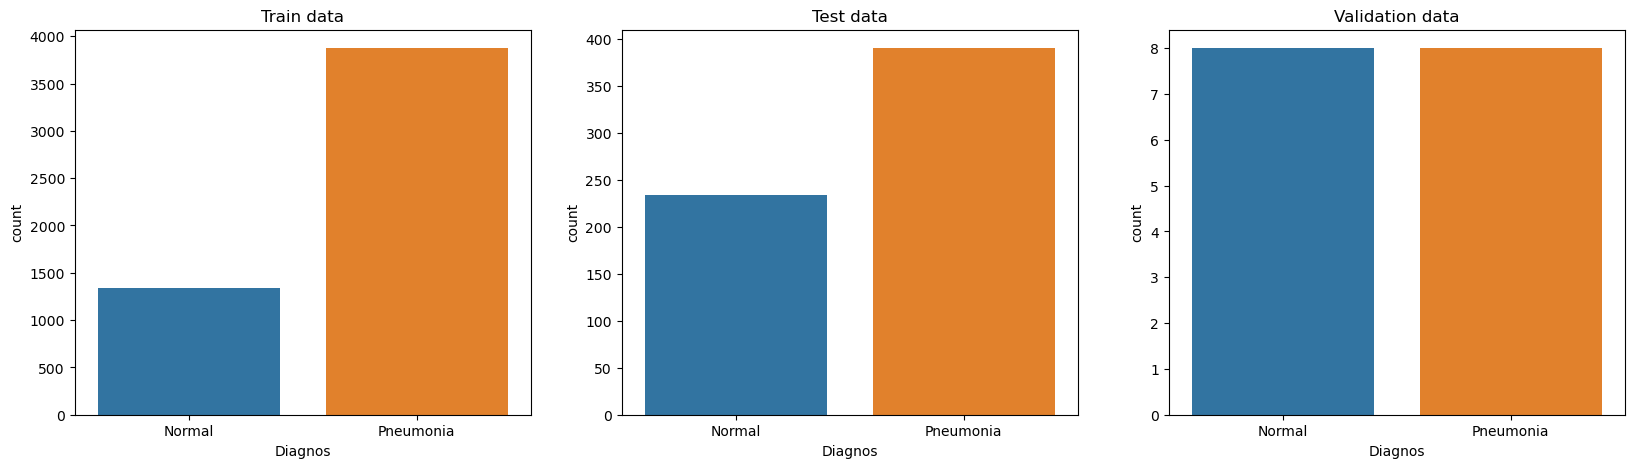

In [17]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
# sns.countplot(train_df['Diagnos'])
sns.countplot(x ='Diagnos', data = train_df)
plt.title('Train data')

plt.subplot(1,3,2)
# sns.countplot(test_df['Diagnos'])
sns.countplot(x ='Diagnos', data = test_df)
plt.title('Test data')

plt.subplot(1,3,3)
# sns.countplot(val_df['Diagnos'])
sns.countplot(x ='Diagnos', data = val_df)
plt.title('Validation data')

plt.show()

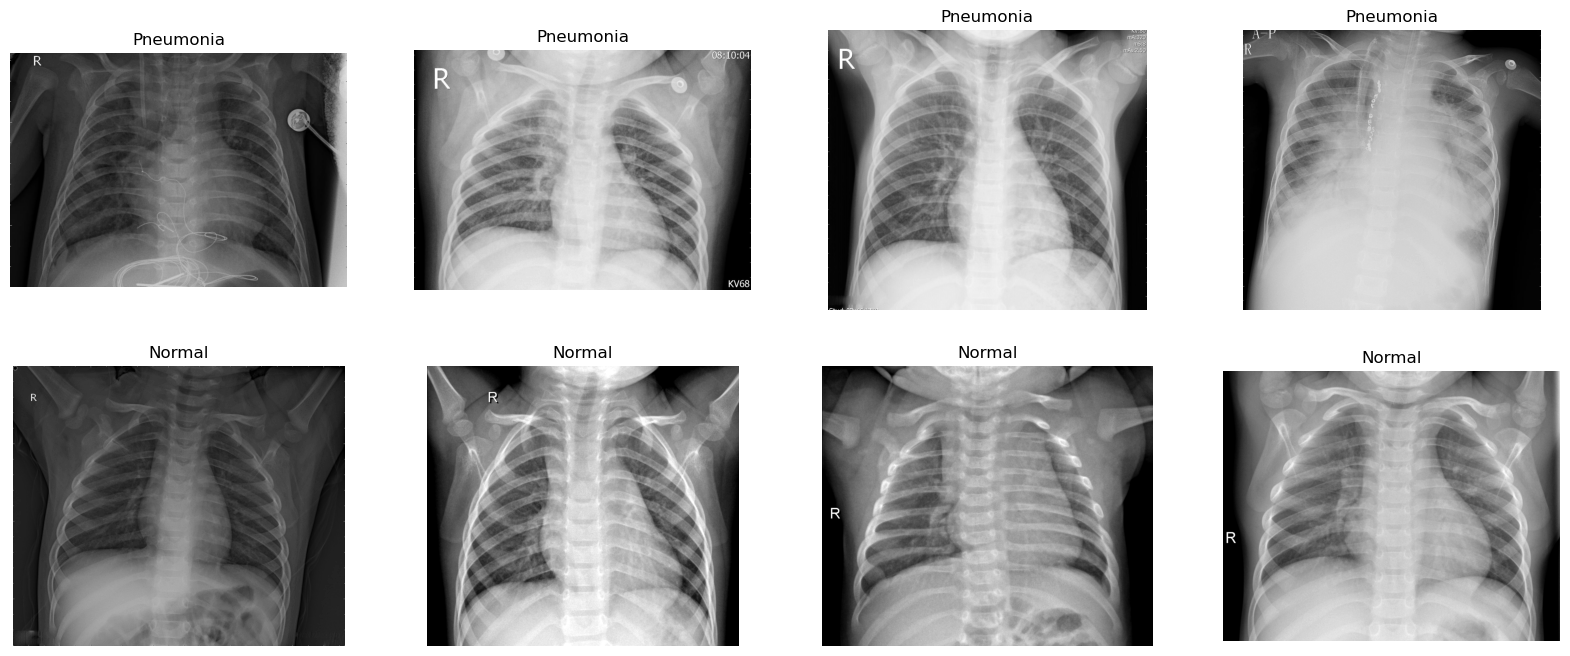

In [18]:
plt.figure(figsize=(20,8))
for i,img_path in enumerate(train_df[train_df['Diagnos'] == "Pneumonia"][0:4]['image']):
    plt.subplot(2,4,i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title('Pneumonia')
    
for i,img_path in enumerate(train_df[train_df['Diagnos'] == "Normal"][0:4]['image']):
    plt.subplot(2,4,4+i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title('Normal')

In [ ]:
x=[]
y=[]

for folder in os.listdir(train_folder):
    image_list=os.listdir(train_folder+"/"+folder)
    for img_name in image_list:
        img=image.load_img(train_folder+"/"+folder+"/"+img_name,target_size=(img_width,img_height))
        img=image.img_to_array(img)
        img=preprocess_input(img)
        x.append(img)  
        y.append(train_class_names.index(folder))
        
print("Preparing Training Dataset Completed.")        